In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Here we adjoin the census data to our training dataframe, and make plots to assess what relationships might exist.

In [8]:
#the restaurant training subset
rd_train = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/level1_data_w_censustract.csv")

In [9]:
#the corresponding census data table to be used
census_data = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/census_data.csv")

In [10]:
#combine the two dataframes
def adjoin_census(df, census_data):    

    census_df = pd.DataFrame({})
    for tract_no in df['census_tract']:
        census_df = pd.concat([census_df, census_data.loc[census_data.tract == tract_no]])


    new_indices = pd.Series([(df.loc[index,"census_tract"] in census_df.tract.values) for index in df.index], index = df.index)
    df = df[new_indices]
    census_df.reset_index(drop = True, inplace = True)
    df.reset_index(drop = True, inplace = True)
    return pd.concat([df, census_df], axis =1)

rd_train = adjoin_census(rd_train, census_data)


In [11]:
rd_train

,name,site,subtypes,category,type,phone,full_address,borough,street,postal_code,...,% White,% Black,% Asian,% Hispanic/Latino,Foreign Born Immigrant %,Median Age,Neighborhood Turnover %,state,county,tract
0,Plaza Pizza and Grill,True,"Pizza restaurant, Breakfast restaurant, Cheese...",restaurants,Pizza restaurant,True,"1614 Cecil B. Moore Ave, Philadelphia, PA 19121",North Philadelphia,1614 Cecil B. Moore Ave,19121.0,...,0.360881,0.452905,0.066041,0.093107,0.075424,22.0,0.000000,42,101,14700
1,Aramingo's Best Pizza,True,"Pizza restaurant, Italian restaurant, Delivery...",restaurants,Pizza restaurant,True,"2885 Aramingo Ave, Philadelphia, PA 19134",Port Richmond,2885 Aramingo Ave,19134.0,...,0.371125,0.184431,0.024382,0.426855,0.061651,32.0,0.000000,42,101,17900
2,Hong Kong Star Noodle House,True,"Chinese restaurant, Delivery Restaurant, Resta...",restaurants,Chinese restaurant,True,"2852 Street Rd, Bensalem, PA 19020",Bensalem,2852 Street Rd,19020.0,...,0.721418,0.073833,0.048138,0.193202,0.162628,42.2,0.001952,42,17,100208
3,Crown Fried Chicken HALAL,True,Chicken restaurant,restaurants,Chicken restaurant,True,"1101 Filbert St, Philadelphia, PA 19107",Center City East,1101 Filbert St,19107.0,...,0.431643,0.323816,0.142761,0.120927,0.186093,35.2,0.006382,42,101,500
4,Southside Pizza - 20th St.,True,"Pizza restaurant, Chicken wings restaurant, Ho...",restaurants,Pizza restaurant,True,"917 S 20th St, Philadelphia, PA 19146",Southwest Center City,917 S 20th St,19146.0,...,0.579871,0.241840,0.124135,0.067013,0.108309,31.1,0.004034,42,101,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,Hatch & Coop,True,"Sandwich shop, Box lunch supplier, Fast food r...",restaurants,Sandwich shop,True,"122 S 12th St, Philadelphia, PA 19107",Center City East,122 S 12th St,19107.0,...,0.715358,0.104437,0.163823,0.070990,0.101024,29.7,0.000000,42,101,600
955,Frida Cantina,True,"Mexican restaurant, Bar",restaurants,Mexican restaurant,True,"1000 Wolf St, Philadelphia, PA 19148",Lower Moyamensing,1000 Wolf St,19148.0,...,0.780535,0.041354,0.112714,0.057126,0.214080,37.0,0.000000,42,101,4002
956,Pete's Pizza,True,"Pizza restaurant, Delivery Restaurant",restaurants,Pizza restaurant,True,"5158 Haverford Ave, Philadelphia, PA 19139",West Philadelphia,5158 Haverford Ave,19139.0,...,0.058983,0.871978,0.038871,0.023206,0.092825,33.1,0.000000,42,101,9300
957,Pearl of East,True,"Chinese restaurant, Delivery Restaurant",restaurants,Chinese restaurant,True,"2049 Oregon Ave, Philadelphia, PA 19145",South Philadelphia,2049 Oregon Ave,19145.0,...,0.896270,0.011753,0.053654,0.055953,0.083035,40.2,0.000000,42,101,3800


In [58]:
#census features to plot with as x
features = census_data.columns[:-3]

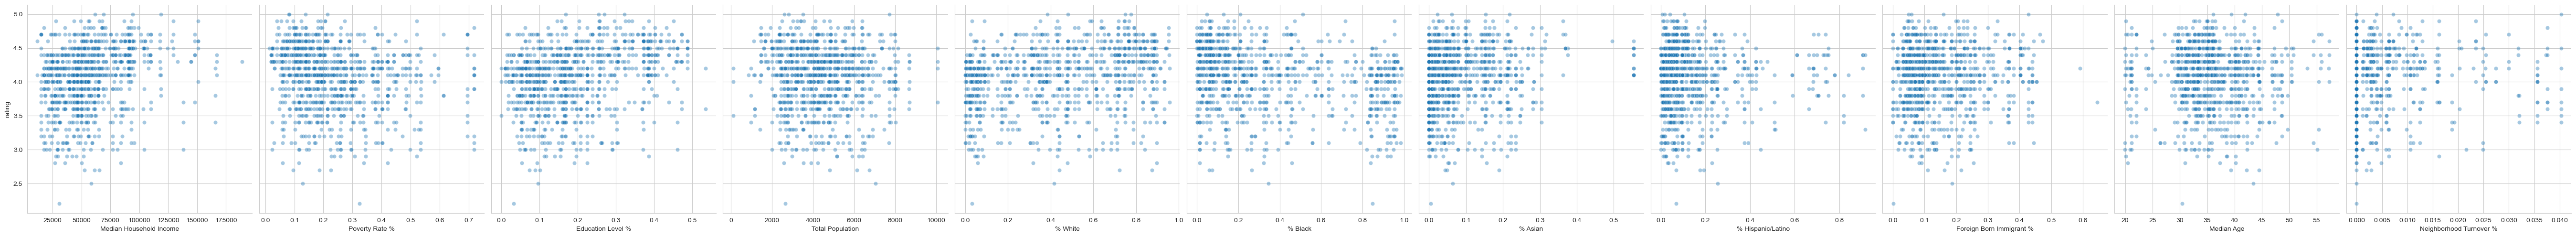

In [63]:
#plot rating against census features
sns.pairplot(rd_train,
                y_vars = ['rating'],
                x_vars = features,
                height = 5,
                plot_kws={'alpha': 0.4},
                diag_kind = None)

plt.show()

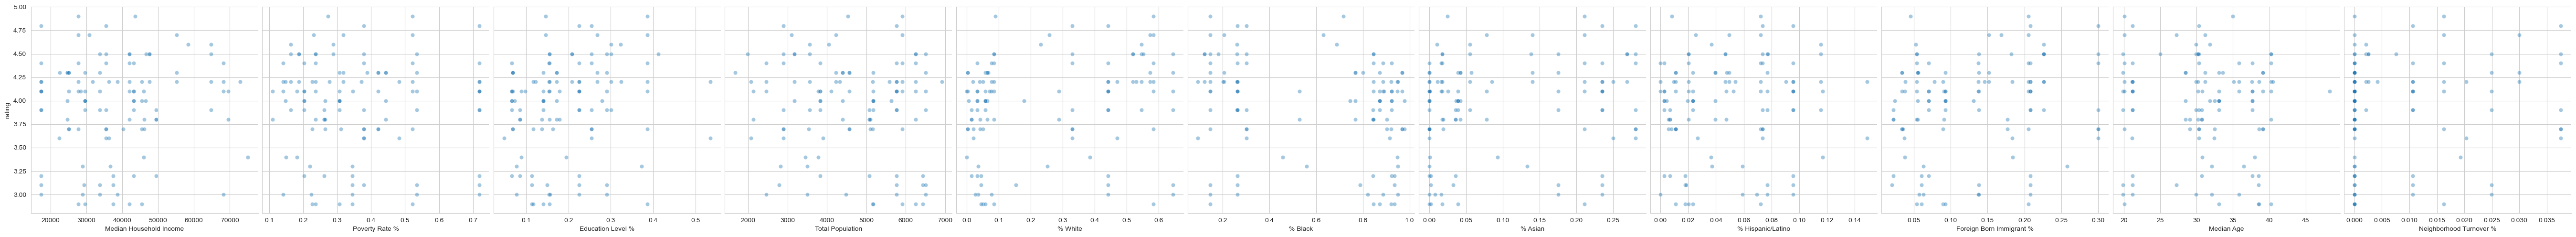

In [64]:
#consideration of same plots restricted to a 'problematic' borough
west_ph = rd_train[rd_train.borough == 'West Philadelphia']

sns.pairplot(west_ph,
                y_vars = ['rating'],
                x_vars = features,
                height = 5,
                plot_kws={'alpha': 0.4},
                diag_kind = None)

plt.show()